In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_starbucks = pd.read_excel('/content/Starbucks data.xlsx')

In [ ]:
df_starbucks.shape

(25, 5)

In [ ]:
df_starbucks.head()

,Amount of Prepaid card,Age,Days per month at starbucks,Income,Cups of Coffee per day
0,5,25,4,20,1
1,25,30,12,35,5
2,10,27,10,30,4
3,5,42,8,30,5
4,15,29,11,25,8


In [ ]:
df_starbucks.isnull().sum()

,0
Amount of Prepaid card,0
Age,0
Days per month at starbucks,0
Income,0
Cups of Coffee per day,0


In [ ]:
df_starbucks.duplicated().sum()

np.int64(0)

In [ ]:
df_starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Amount of Prepaid card       25 non-null     int64
 1   Age                          25 non-null     int64
 2   Days per month at starbucks  25 non-null     int64
 3   Income                       25 non-null     int64
 4   Cups of Coffee per day       25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [ ]:
Q1 = df_starbucks.quantile(0.25)
Q3 = df_starbucks.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df_starbucks < (Q1 - 1.5 * IQR)) | (df_starbucks > (Q3 + 1.5 * IQR))).any(axis=1)

# Print the rows with outliers
print("Rows with outliers:")
print(df_starbucks[outliers])

Rows with outliers:
    Amount of Prepaid card  Age  Days per month at starbucks  Income  \
5                       50   25                           12      60   
13                     200   33                           12      30   
14                      15   40                           15      80   
18                     100   26                           15      35   
19                      30   38                           19      45   

    Cups of Coffee per day  
5                        5  
13                       2  
14                       5  
18                       5  
19                      10  


In [ ]:
df_starbucks_cleaned = df_starbucks[~outliers]

print("Shape of the original DataFrame:", df_starbucks.shape)
print("Shape of the DataFrame after removing outliers:", df_starbucks_cleaned.shape)

Shape of the original DataFrame: (25, 5)
Shape of the DataFrame after removing outliers: (20, 5)


In [ ]:
df_starbucks_cleaned.head()

,Amount of Prepaid card,Age,Days per month at starbucks,Income,Cups of Coffee per day
0,5,25,4,20,1
1,25,30,12,35,5
2,10,27,10,30,4
3,5,42,8,30,5
4,15,29,11,25,8


Correlation with 'Cups of Coffee per day':
Cups of Coffee per day         1.000000
Days per month at starbucks    0.385107
Age                            0.152281
Income                        -0.065844
Amount of Prepaid card        -0.321169
Name: Cups of Coffee per day, dtype: float64


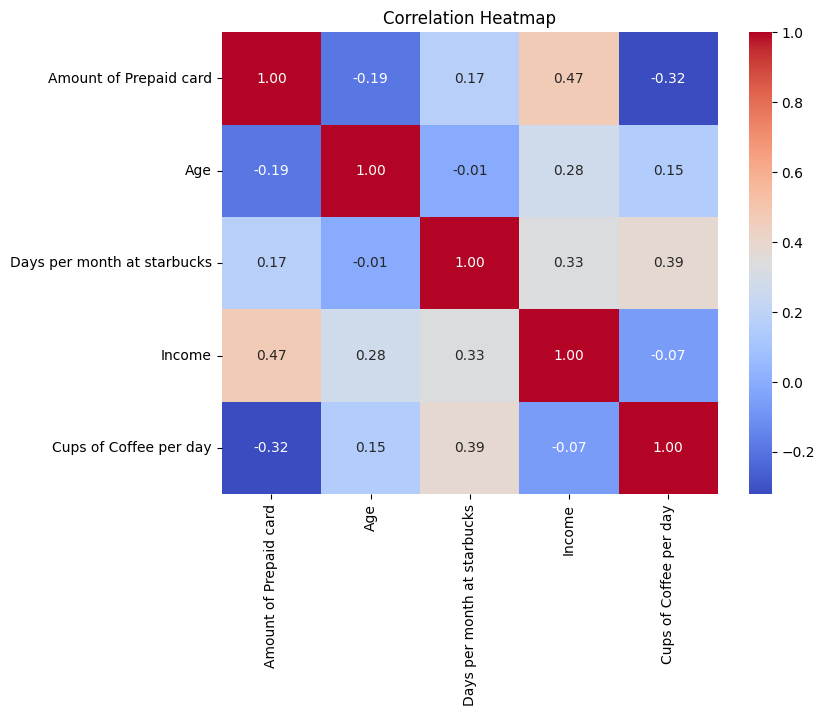

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_starbucks_cleaned.corr()

# Get correlations with the target variable 'Cups of Coffee per day'
target_correlation = correlation_matrix['Cups of Coffee per day'].sort_values(ascending=False)

# Print the correlations with the target variable
print("Correlation with 'Cups of Coffee per day':")
print(target_correlation)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df_starbucks_cleaned.drop('Cups of Coffee per day', axis=1)
y = df_starbucks_cleaned['Cups of Coffee per day']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5.1538099745956645
R-squared: -1.5769049872978322


In [ ]:
model.predict([[25, 30, 12, 35]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.6066102])

In [ ]:
import joblib
joblib.dump(model, 'Starbucks_MLR.pkl')
print("Model saved as Starbucks_MLR.pkl")

Model saved as Starbucks_MLR.pkl
